# Diamonds End-To-End Project



## Information about the data

*  Analyze diamonds by their cut, color, clarity, price, and other attributes
*  This classic dataset contains the prices and other attributes of almost 54,000 diamonds. 


index | Column name | Type | Description| Data Range
------|-------------|------|------------|------------
1. | carat | Numeric | weight of the diamond | (0.2--5.01)
2. | cut | String | Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal | (Fair, Good, Very Good, Premium, Ideal)
3. | color | String | Color of the diamond | from J (worst) to D (best)
4. | clarity | String | How obvious inclusions are within the diamond | (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
5. | depth | Numeric | The height of a diamond, measured from the culet to the table, divided by its average girdle diameter  = z  mean(x, y) = 2 * z / (x + y)| (43--79)
6. | table | Numeric | The width of the diamond's table expressed as a percentage of its average diameter | (43--95)
7. | price | Numeric | the price of the diamond | \$326--\$18,823
8. | x | Numeric | length mm | 0--10.74
9. | y | Numeric | width mm | 0--58.9
10. | z | Numeric | depth in mm | 0--31.8

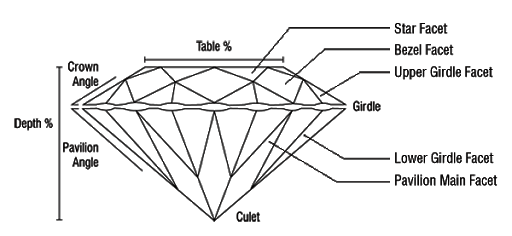

## Import libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

## Load the Data

In [68]:
url = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"
Diamonds = pd.read_csv(url)

## Exploring the contents 

In [69]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [70]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [71]:
Diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [72]:
print(Diamonds["cut"].value_counts(), Diamonds["color"].value_counts(),
      Diamonds["clarity"].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


## Which rows contains zero value? Drop them

In [73]:
Diamonds.loc[(Diamonds["x"] == 0) | (Diamonds["y"] == 0) | (Diamonds["z"] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [74]:
Diamonds.loc[(Diamonds["x"] == 0) | (Diamonds["y"] == 0) | (Diamonds["z"] == 0)].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

In [75]:
Diamonds = Diamonds.drop(Diamonds[Diamonds.x == 0].index)
Diamonds = Diamonds.drop(Diamonds[Diamonds.y == 0].index)
Diamonds = Diamonds.drop(Diamonds[Diamonds.z == 0].index)

# Visualize the Data

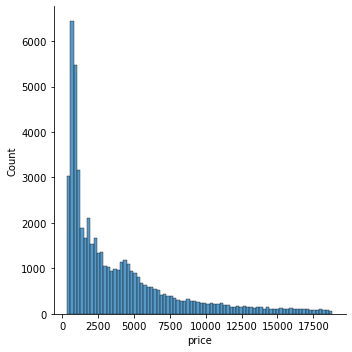

In [76]:
#Examine distribution of target variable
sns.displot(Diamonds['price'])

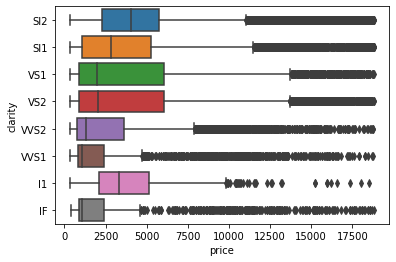

In [77]:
sns.boxplot(data=Diamonds, y='clarity', x='price')
plt.show()

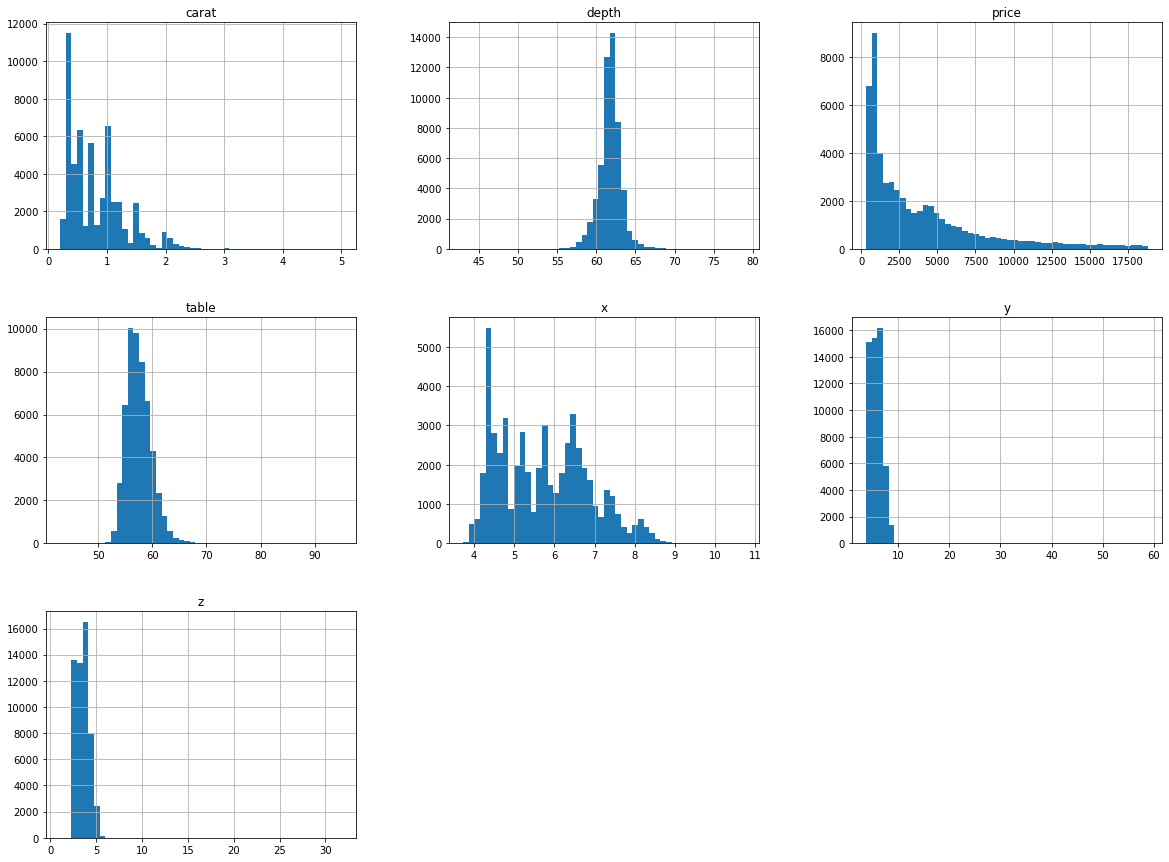

In [78]:
#Histogram all colomns
all_col_hist = Diamonds.hist(bins=50, figsize=(20,15))

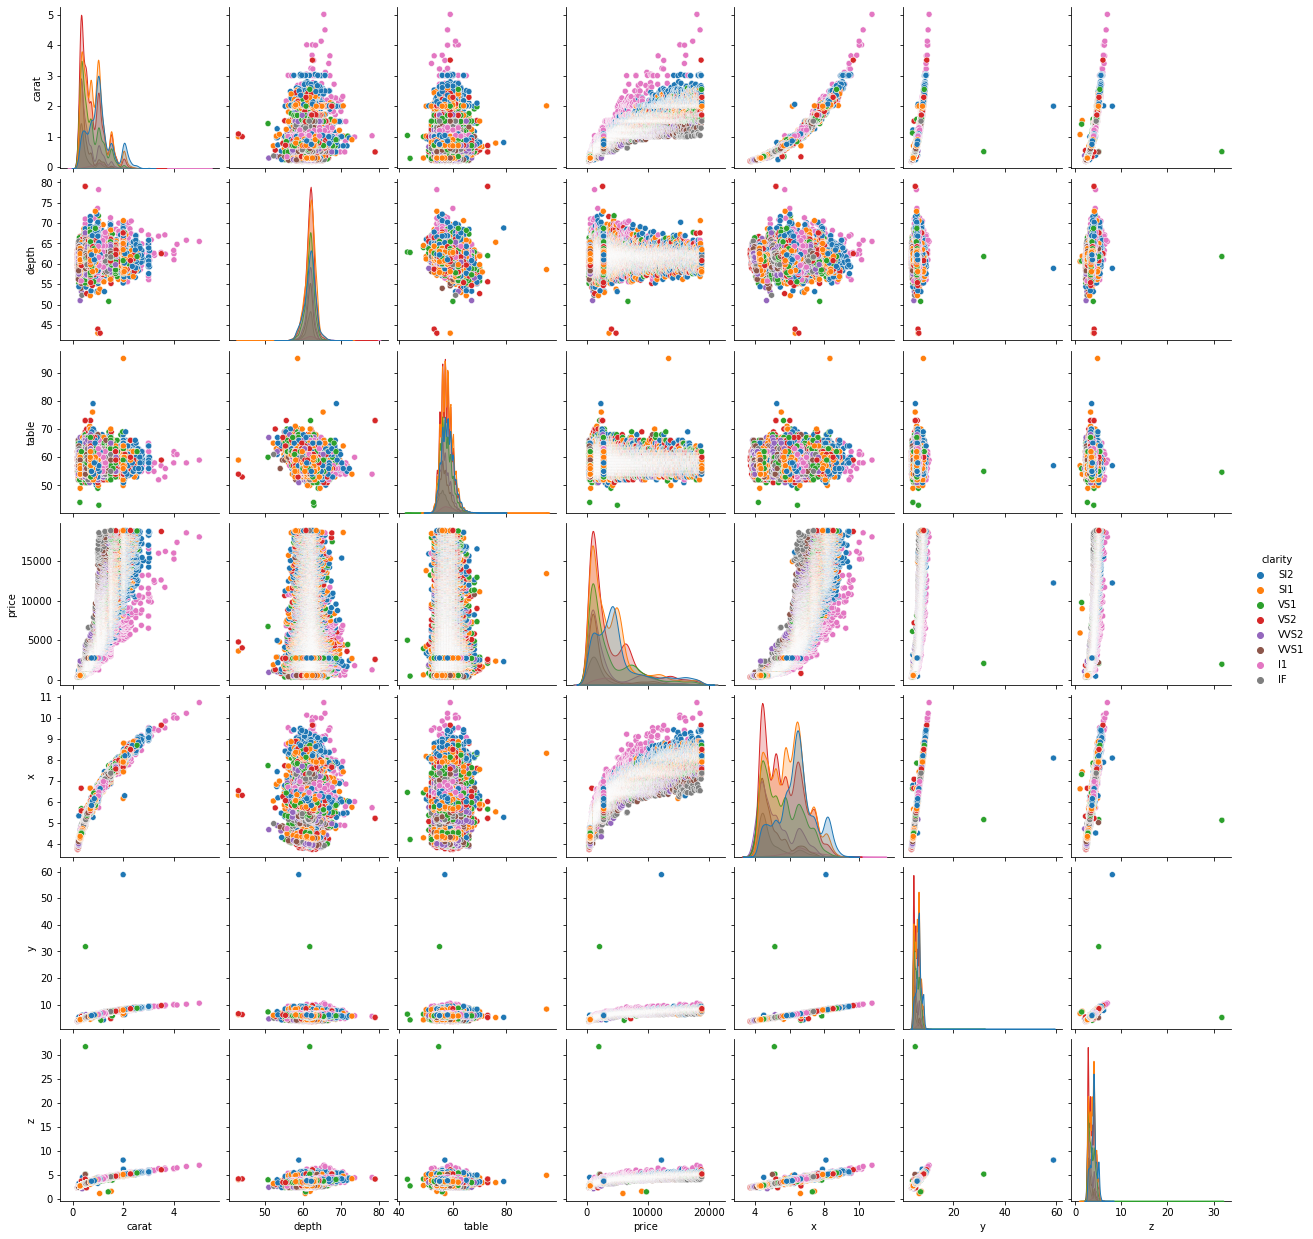

In [79]:
attributes = ["carat", "depth", "table", "price", "x" ,"y" ,"z","cut","color","clarity"]
sns.pairplot(Diamonds[attributes], hue='clarity')

# x, y, z features and what field diamonds are in?

Text(0.5, 0, 'Z Label')

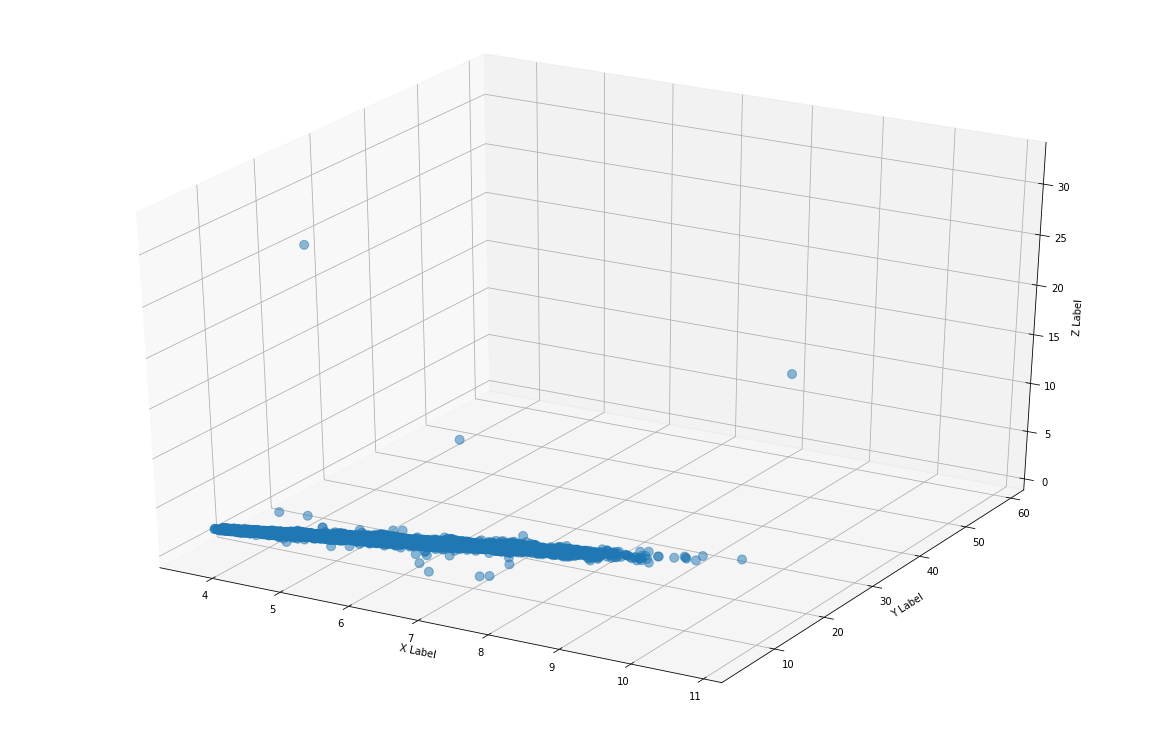

In [80]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# plot 3D
ax.scatter(xs=Diamonds['x'], ys=Diamonds['y'], zs=Diamonds['z'], s=80, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [81]:
Diamonds = Diamonds.drop(Diamonds.loc[Diamonds.y > 32].index)
Diamonds = Diamonds.drop(Diamonds.loc[Diamonds.z > 9].index)

Text(0.5, 0, 'Z Label')

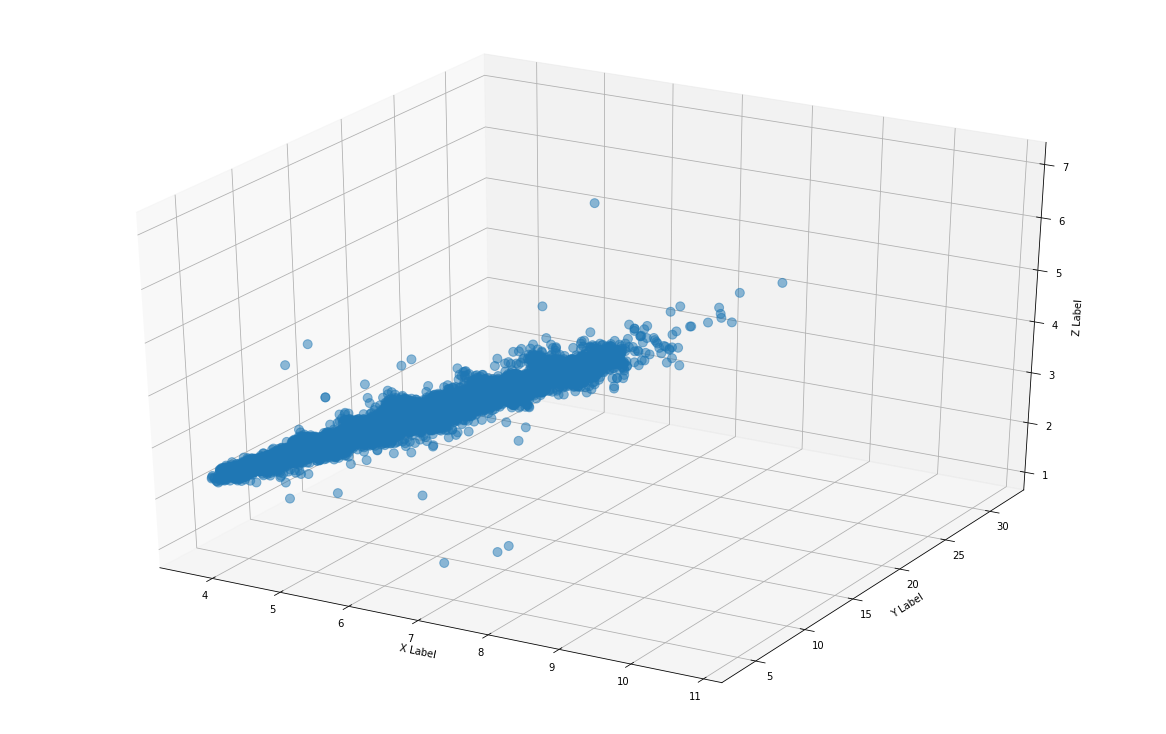

In [82]:
fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# plot 3D
ax.scatter(xs=Diamonds['x'], ys=Diamonds['y'], zs=Diamonds['z'], s=80, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Encoding Categorical Variable

In [83]:
#replace the cut category with numbers 1-5
cut_map = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4,'Ideal':5}
Diamonds["cut"] = Diamonds["cut"].map(cut_map)

#replace the color category with numbers 1-7
color_map = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
Diamonds["color"] = Diamonds["color"].map(color_map)

#replace the clarity category with numbers 1-8
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
Diamonds["clarity"] = Diamonds["clarity"].map(clarity_map)


# Relationship between volume and price.

In [84]:
#add a new volume feature
Diamonds['volume']=Diamonds['x']*Diamonds['y']*Diamonds['z']


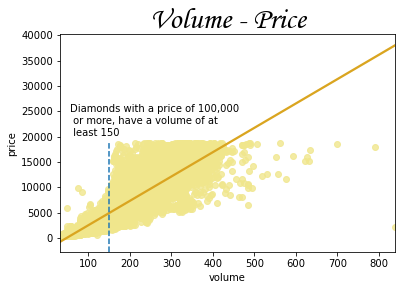

In [85]:
fig = sns.regplot(x="volume", y="price", data=Diamonds, fit_reg=True, scatter_kws={"color": "khaki"}, line_kws={"color": "goldenrod"})
fig.set_title('Volume - Price',fontdict={'fontsize': 30,'fontweight':20,'color':'black','fontfamily':'Monotype Corsiva'})
fig.text(55,20200, "Diamonds with a price of 100,000\n or more, have a volume of at\n least 150",size=10)
fig.axvline(150, ls='--',ymax=0.5)

In [86]:
Diamonds = Diamonds.drop('x',axis=1)
Diamonds = Diamonds.drop('y',axis=1)
Diamonds = Diamonds.drop('z',axis=1)


In [87]:
Diamonds 

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,115.920000
53936,0.72,2,7,3,63.1,55.0,2757,118.110175
53937,0.70,3,7,3,62.8,60.0,2757,114.449728
53938,0.86,4,3,2,61.0,58.0,2757,140.766120


# Correlation between the features

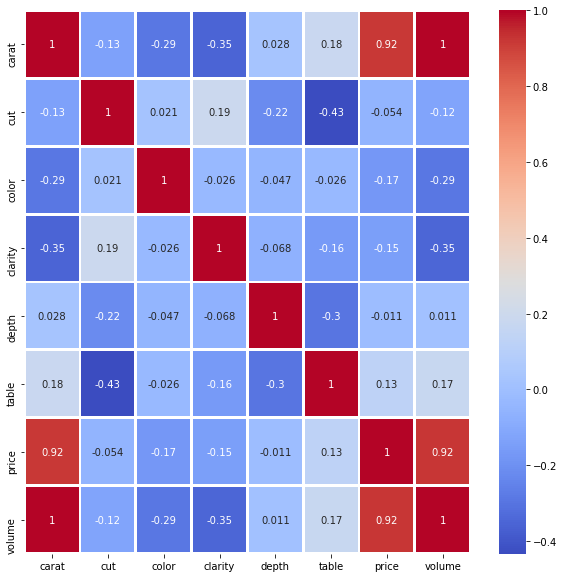

In [88]:
#calculate correlation of features
correlation= Diamonds.corr()
correlation
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,cmap="coolwarm",annot=True,linewidths=2)

# Model

In [89]:
#split the data into training and test dataset.
from sklearn.model_selection import train_test_split
X = Diamonds.drop(['price'], axis = 1)
y =Diamonds.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

#function to display the predicted price difference from their real price.
def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Predicted Price', ylabel = 'Actual Price - Predicted Price',
           title = 'between what is desired and what is present')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

# *Linear Regression

In [90]:
#The "linear regression" formula calculates the straight line passing through the points in the sample.
#The line is calculated in such a way that the sum of the squares of the distances of the points from the line is the smallest.

reg = LinearRegression()
# fit the model
reg.fit(X_train, y_train)
# predict the prices of X_test
lin_y_pred=reg.predict(X_test)


In [91]:
print('R2_train          : ', reg.score(X_train, y_train))



R2_train          :  0.9044673091397171


In [92]:
# print the accuracy by each measure:
print('Linear regression accuracy: ')
msel = mean_squared_error(y_test, lin_y_pred)
rmsel = mean_squared_error(y_test, lin_y_pred)**0.5
mael = mean_absolute_error(y_test, lin_y_pred)
r2l = r2_score(y_test, lin_y_pred)

print('R2_test       : ', r2l)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')

Linear regression accuracy: 
R2_test       :  0.9062463203042893
MAE           :  856.6423684514896
MSE (RMSE)    :  1493048.8993555296  ( 1221.9038011871187 )


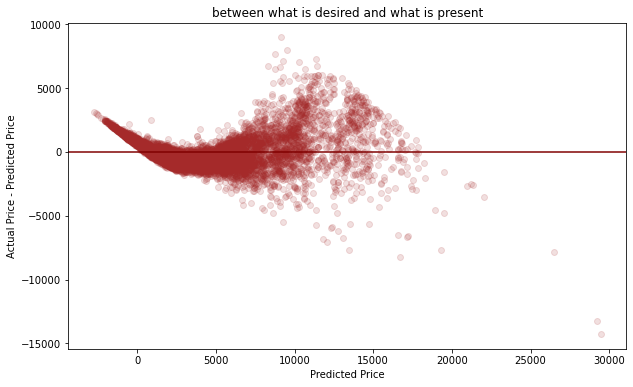

In [93]:
differencePlot(y_test, lin_y_pred, 'brown', 'maroon')

# *Random Forest Regressor

In [94]:
#This model works differently from that of the "linear regression"
#and determines the price of the diamond based on decision trees.

rf = RandomForestRegressor()
# fit the model
rf.fit(X_train, y_train)
# predict the prices of X_test
rf_pre =rf.predict(X_test)

In [95]:
print('R2_train          : ',rf.score(X_train, y_train))

R2_train          :  0.9973576102230615


In [96]:
# print the accuracy by each measure:
print('Random Forest Regressor accuracy: ')

mser = mean_squared_error(y_test, rf_pre)
rmser = mean_squared_error(y_test, rf_pre)**0.5
maer = mean_absolute_error(y_test, rf_pre)
r2r = r2_score(y_test, rf_pre)
print('R2_test       : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Random Forest Regressor accuracy: 
R2_test       :  0.9819003906443861
MAE           :  277.096841090269
MSE (RMSE)    :  288240.4393605978  ( 536.8802840118063 )


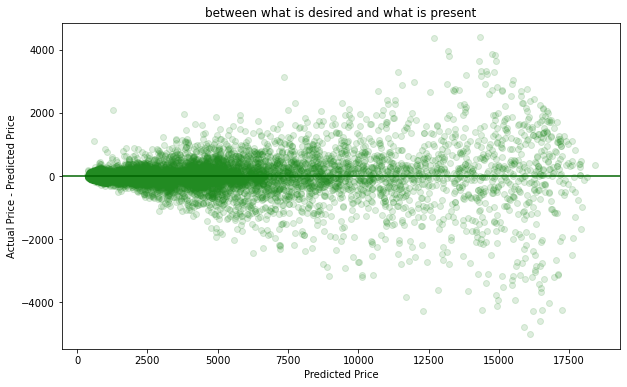

In [97]:
differencePlot(y_test, rf_pre, 'forestgreen', 'darkgreen')

# *DecisionTree Regressor

In [98]:
Dt = DecisionTreeRegressor(random_state = 0)
# fit the model
Dt.fit(X_train, y_train)
# predict the prices of X_test
Dt_pre =Dt.predict(X_test)

In [99]:
print('R2_train          : ',Dt.score(X_train, y_train))

R2_train          :  0.9999292864808331


In [100]:
# print the accuracy by each measure:
print('Decision Tree Regressor accuracy: ')
mser = mean_squared_error(y_test, Dt_pre)
rmser = mean_squared_error(y_test, Dt_pre)**0.5
maer = mean_absolute_error(y_test, Dt_pre)
r2r = r2_score(y_test, Dt_pre)

print('R2_test       : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Decision Tree Regressor accuracy: 
R2_test       :  0.9657702646616393
MAE           :  360.54596315529176
MSE (RMSE)    :  545116.4033032476  ( 738.3199870674284 )


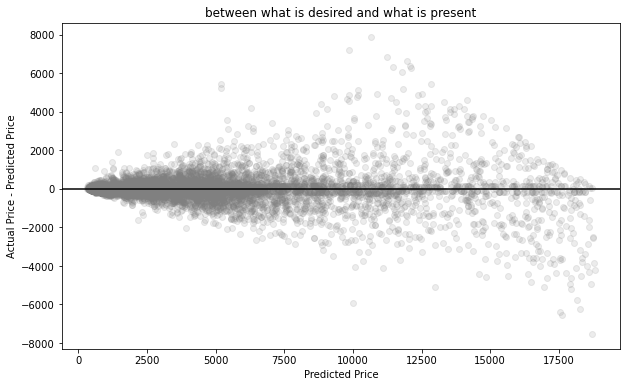

In [101]:
differencePlot(y_test, Dt_pre, 'gray', 'black')

# End of the Project